# Python library

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("movies_metadata.csv")

In [3]:
data.shape

(45466, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

# Data preprocessing

In [5]:
data.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [6]:
# Filling missing values present in columns

data['genres'] = data['genres'].fillna('').str.lower()  
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce').fillna(0)
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['runtime'] = pd.to_numeric(data['runtime'], errors='coerce').fillna(0)

In [7]:
data.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   0
poster_path                386
production_companies         3
production_countries         3
release_date                90
revenue                      6
runtime                      0
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

# Exploratory Data Analysis (EDA)

In [8]:
top_movies = {}

In [9]:
# Top 5 movies by Popularity
top_movies['top_by_popularity'] = data.nlargest(5, 'popularity')

In [10]:
# Top 5 movies by Popularity
top_movies['top_by_popularity'] = data.nlargest(5, 'popularity')

In [11]:
# Top 5 movies by Runtime (longest)
top_movies['top_by_runtime'] = data.nlargest(5, 'runtime')


In [12]:
# Top 5 movies by Vote Average (highest ratings)
top_movies['top_by_vote_average'] = data.nlargest(5, 'vote_average')


In [13]:
# Top 5 movies by Vote Count (most votes)
top_movies['top_by_vote_count'] = data.nlargest(5, 'vote_count')

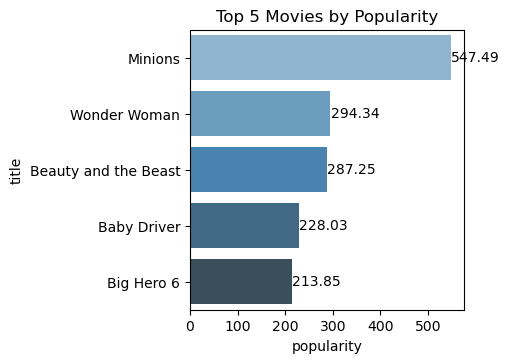

In [14]:
# Visualizing the top 5 movies in each category
plt.figure(figsize=(12, 8))  


plt.subplot(2, 3, 1)
ax1 = sns.barplot(x='popularity', y='title', data=top_movies['top_by_popularity'], palette='Blues_d')
plt.title('Top 5 Movies by Popularity')
for p in ax1.patches:
    ax1.text(p.get_width() + 1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10, color='black')

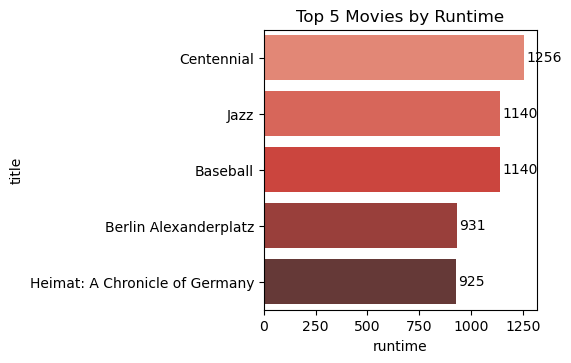

In [15]:
# Plot for Top 5 Movies by Runtime
plt.figure(figsize=(12, 8))  
plt.subplot(2, 3, 3)
ax3 = sns.barplot(x='runtime', y='title', data=top_movies['top_by_runtime'], palette='Reds_d')
plt.title('Top 5 Movies by Runtime')
for p in ax3.patches:
    ax3.text(p.get_width() + 10, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10, color='black')



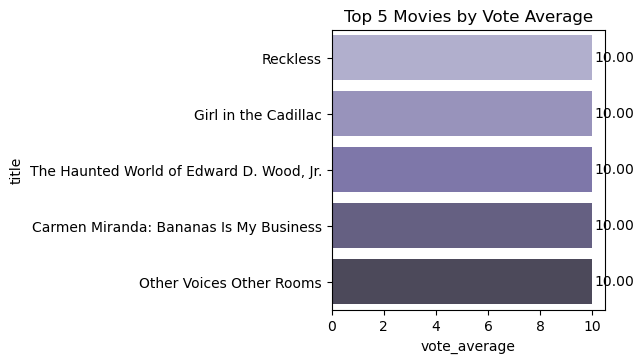

In [16]:
# Plot for Top 5 Movies by Vote Average
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 4)
ax4 = sns.barplot(x='vote_average', y='title', data=top_movies['top_by_vote_average'], palette='Purples_d')
plt.title('Top 5 Movies by Vote Average')
for p in ax4.patches:
    ax4.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10, color='black')

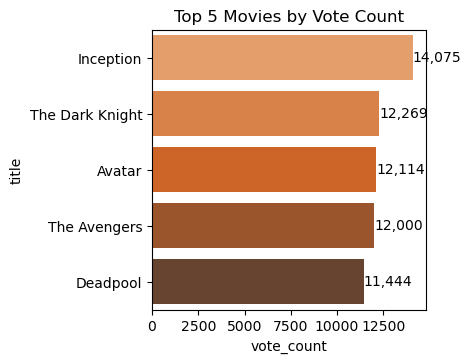

In [17]:
# Plot for Top 5 Movies by Vote Count
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 5)
ax5 = sns.barplot(x='vote_count', y='title', data=top_movies['top_by_vote_count'], palette='Oranges_d')
plt.title('Top 5 Movies by Vote Count')
for p in ax5.patches:
    ax5.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():,.0f}', ha='left', va='center', fontsize=10, color='black')

In [18]:
# Movies with the highest popularity and revenue
high_pop_revenue_movies = data[(data['popularity'] > data['popularity'].quantile(0.95)) &
                             (data['revenue'] > data['revenue'].quantile(0.95))]

print("\nMovies with high popularity and high revenue:")
print(high_pop_revenue_movies[['title', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']])


Movies with high popularity and high revenue:
                               title  popularity      revenue  runtime  \
0                          Toy Story   21.946943  373554033.0     81.0   
1                            Jumanji   17.015539  262797249.0    104.0   
5                               Heat   17.924927  187436818.0    170.0   
9                          GoldenEye   14.686036  352194034.0    130.0   
20                        Get Shorty   12.669608  115101622.0    105.0   
...                              ...         ...          ...      ...   
44678                        Dunkirk   30.938854  519876949.0    107.0   
44842  Transformers: The Last Knight   39.186819  604942143.0    149.0   
45014                 The Dark Tower   50.903593   71000000.0     95.0   
45139                The Emoji Movie   33.694599   66913939.0     86.0   
45167                     Wind River   40.796775  184770205.0    111.0   

       vote_average  vote_count  
0               7.7      5415.

In [19]:
# Movies with high ratings (vote_average > 9)
high_rated_movies = data[data['vote_average'] > 9]
print("\nHigh Rated Movies (Vote Average > 8):")
print(high_rated_movies[['title', 'popularity', 'runtime', 'vote_average', 'vote_count']])


High Rated Movies (Vote Average > 8):
                                          title  popularity  runtime  \
186                                    Reckless    0.119713     91.0   
394                        Girl in the Cadillac    0.405392     89.0   
706    The Haunted World of Edward D. Wood, Jr.    0.037443    112.0   
738      Carmen Miranda: Bananas Is My Business    0.146287     91.0   
1634                   Other Voices Other Rooms    0.036680      0.0   
...                                         ...         ...      ...   
45047                           The Human Surge    0.484825     96.0   
45198                          First Round Down    0.422836      0.0   
45251                             Der Herr Karl    0.192235     60.0   
45362         The Many Faces of Christopher Lee    0.051939     60.0   
45371     LEGO DC Super Hero Girls: Brain Drain    8.413734      0.0   

       vote_average  vote_count  
186            10.0         1.0  
394            10.0         

# Multi-factor recommendation function

In [20]:

def recommend_movies_by_factors(
    genres=None, min_popularity=0, max_runtime=None, year_range=None, data=data, top_n=10
):
    # Start with the full dataset
    filtered_df = data

    # Filter by genres
    if genres:
        genres = [g.lower() for g in genres]
        filtered_df = filtered_df[filtered_df['genres'].apply(
            lambda x: any(genre in x for genre in genres)
        )]

    # Filter by popularity
    filtered_df = filtered_df[filtered_df['popularity'] >= min_popularity]

    # Filter by runtime
    if max_runtime:
        filtered_df = filtered_df[filtered_df['runtime'] <= max_runtime]

    # Filter by year range
    if year_range:
        start_year, end_year = year_range
        filtered_df = filtered_df[
            (filtered_df['release_date'].dt.year >= start_year) &
            (filtered_df['release_date'].dt.year <= end_year)
        ]

    # Sort by popularity and return top recommendations
    filtered_df = filtered_df.sort_values(by='popularity', ascending=False)
    return filtered_df.head(top_n)[['title', 'genres', 'popularity', 'release_date', 'runtime']]

In [21]:
user_filters = {
    "genres": ["Action", "Adventure"],
    "min_popularity": 50,
    "max_runtime": 120,
    "year_range": (2000, 2020)
}

recommendations = recommend_movies_by_factors(**user_filters)
print(recommendations)

                                          title  \
30700                                   Minions   
43644                               Baby Driver   
24455                                Big Hero 6   
26564                                  Deadpool   
24351                                 John Wick   
43286  Captain Underpants: The First Epic Movie   
24121                           The Maze Runner   
42309                        Ghost in the Shell   
43301                      Boyka: Undisputed IV   
26565                            Thor: Ragnarok   

                                                  genres  popularity  \
30700  [{'id': 10751, 'name': 'family'}, {'id': 16, '...  547.488298   
43644  [{'id': 28, 'name': 'action'}, {'id': 80, 'nam...  228.032744   
24455  [{'id': 12, 'name': 'adventure'}, {'id': 10751...  213.849907   
26564  [{'id': 28, 'name': 'action'}, {'id': 12, 'nam...  187.860492   
24351  [{'id': 28, 'name': 'action'}, {'id': 53, 'nam...  183.870374   
43286 